In [1]:
# 한국어 적용 코드
import matplotlib.font_manager as fm
font_location = "C:\\Windows\Fonts\malgunbd.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc("font", family=font_name)

In [2]:
mu = 0 # 평균 : 0
std = 1 # 표준편차 : 1
rv = sp.stats.norm(mu, std)

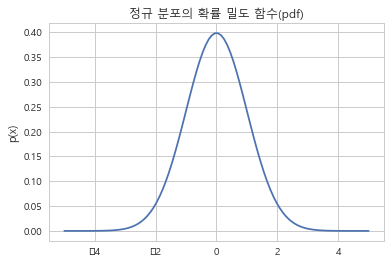

In [3]:
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("정규 분포의 확률 밀도 함수(pdf)")
plt.show()

In [4]:
x = rv.rvs(100, random_state=0)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

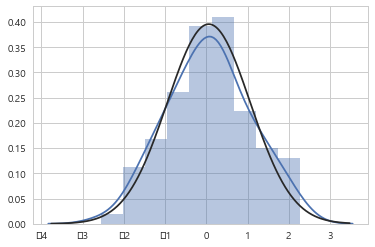

In [9]:
# kde : 본 함수를 유연하게 그리기, fit : 비교할 함수
sns.distplot(x, kde=True, fit=sp.stats.norm) 
plt.show()

### Q-Q Plot
- 가지고 있는 분포를 분위로 쪼개서 정규분포의 분위와 일대일 대응시켜봐서 
- 정규분포인지 아닌지 시각적으로 판단하도록 도와줌

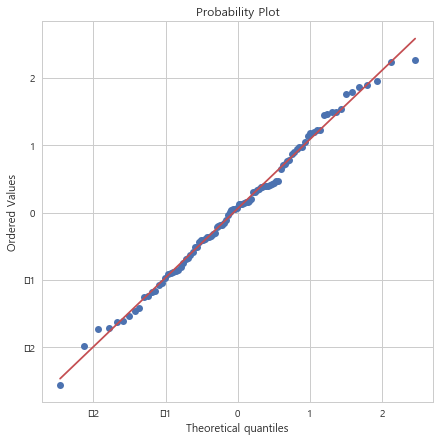

In [12]:
np.random.seed(0)
x = np.random.randn(100) # randn 자체가 정규분포를 따라 값이 뽑힘
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
# plt.axis("equal")
plt.show()

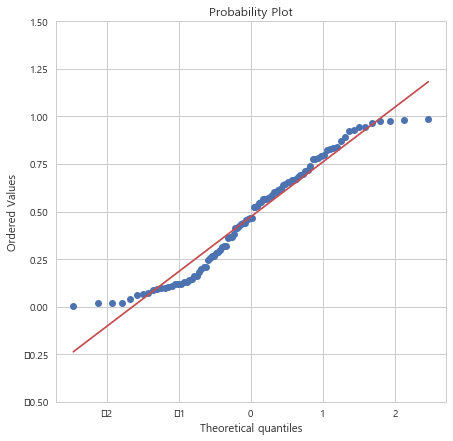

In [14]:
np.random.seed(0)
x = np.random.rand(100) # uniform 분포이기 때문에 short tail형태로 그래프가 나옴.
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

In [34]:
X = np.random.rand(2,10) # 2 X 10 matrix
print(X,"\n\n",X.mean(axis=1),"\n\n", X.mean(axis=0))

# axis = 1 : 각 행의 연산(평균, 합계....)
# axis = 0 : 각 열의 연산

[[0.72793362 0.81060006 0.40096733 0.26449708 0.40538817 0.38738101
  0.41837079 0.91168245 0.65165733 0.47296824]
 [0.95130952 0.13127027 0.28812368 0.36073482 0.42958617 0.28182586
  0.99592974 0.56684158 0.8111573  0.05845372]] 

 [0.54514461 0.48752327] 

 [0.83962157 0.47093516 0.3445455  0.31261595 0.41748717 0.33460343
 0.70715026 0.73926202 0.73140731 0.26571098]


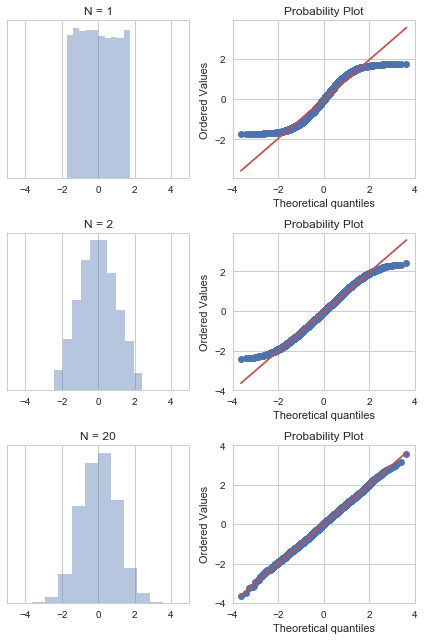

In [10]:
# 여기에서는 0부터 1까지의 균일 분포의 기댓값이 0.5 , 
# 분산이 1/12 라는 사실을 이용

np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6,9))
for i, N in enumerate([1, 2, 20]):
    X = np.random.rand(5000, N) # uniform 분포 
    # 세트당(각 행벡터) 평균을 내고 정규화까지 하는 과정...총 5000세트
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N) 
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)

plt.tight_layout()
plt.show()

<class 'numpy.ndarray'>


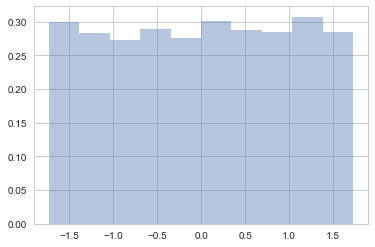

In [39]:
# N = 1 인 경우를 좀 더 자세하게 보자.

X = np.random.rand(5000, 1) # uniform 분포 
# 세트당(각 행벡터) 평균을 내고 정규화까지 하는 과정...총 5000세트
Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * 1) 
print(type(Xbar))
sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)